100%|██████████| 1/1 [00:00<00:00,  1.26it/s]

it ran


In [10]:
dataset_description = data_dcms.get_dataset_description() 
dataset_description.head(10)

Patients processed: 100%|██████████| 1/1 [00:00<00:00,  1.92it/s]


,Modality,SliceThickness,PixelSpacing,SeriesDate,Manufacturer,patient,slice#
0,CT,3.0,"[0.9765625, 0.9765625]",20080918,SIEMENS,manifest-1649682145244_1-1,0
1,CT,3.0,"[0.9765625, 0.9765625]",20080918,SIEMENS,manifest-1649682145244_1-1,1
2,CT,3.0,"[0.9765625, 0.9765625]",20080918,SIEMENS,manifest-1649682145244_1-1,2
3,CT,3.0,"[0.9765625, 0.9765625]",20080918,SIEMENS,manifest-1649682145244_1-1,3
4,CT,3.0,"[0.9765625, 0.9765625]",20080918,SIEMENS,manifest-1649682145244_1-1,4
5,CT,3.0,"[0.9765625, 0.9765625]",20080918,SIEMENS,manifest-1649682145244_1-1,5
6,CT,3.0,"[0.9765625, 0.9765625]",20080918,SIEMENS,manifest-1649682145244_1-1,6
7,CT,3.0,"[0.9765625, 0.9765625]",20080918,SIEMENS,manifest-1649682145244_1-1,7
8,CT,3.0,"[0.9765625, 0.9765625]",20080918,SIEMENS,manifest-1649682145244_1-1,8
9,CT,3.0,"[0.9765625, 0.9765625]",20080918,SIEMENS,manifest-1649682145244_1-1,9


In [4]:
print('Unique modalities found: ', np.unique(dataset_description.Modality.values)[0])

Unique modalities found:  CT


In [11]:
ct_dcms = ToolBox(**parameters)
dataset_description = ct_dcms.get_dataset_description('CT') 
dataset_description.head(10)

Patients processed: 100%|██████████| 1/1 [00:00<00:00,  1.52it/s]


,PatientName,ConvolutionKernel,SliceThickness,PixelSpacing,KVP,Exposure,XRayTubeCurrent,SeriesDate,patient,slice#
0,"(L, U, N, G, 1, -, 0, 0, 1)",B19f,3.0,"[0.9765625, 0.9765625]",120.0,400,80,20080918,manifest-1649682145244_1-1,0
1,"(L, U, N, G, 1, -, 0, 0, 1)",B19f,3.0,"[0.9765625, 0.9765625]",120.0,400,80,20080918,manifest-1649682145244_1-1,1
2,"(L, U, N, G, 1, -, 0, 0, 1)",B19f,3.0,"[0.9765625, 0.9765625]",120.0,400,80,20080918,manifest-1649682145244_1-1,2
3,"(L, U, N, G, 1, -, 0, 0, 1)",B19f,3.0,"[0.9765625, 0.9765625]",120.0,400,80,20080918,manifest-1649682145244_1-1,3
4,"(L, U, N, G, 1, -, 0, 0, 1)",B19f,3.0,"[0.9765625, 0.9765625]",120.0,400,80,20080918,manifest-1649682145244_1-1,4
5,"(L, U, N, G, 1, -, 0, 0, 1)",B19f,3.0,"[0.9765625, 0.9765625]",120.0,400,80,20080918,manifest-1649682145244_1-1,5
6,"(L, U, N, G, 1, -, 0, 0, 1)",B19f,3.0,"[0.9765625, 0.9765625]",120.0,400,80,20080918,manifest-1649682145244_1-1,6
7,"(L, U, N, G, 1, -, 0, 0, 1)",B19f,3.0,"[0.9765625, 0.9765625]",120.0,400,80,20080918,manifest-1649682145244_1-1,7
8,"(L, U, N, G, 1, -, 0, 0, 1)",B19f,3.0,"[0.9765625, 0.9765625]",120.0,400,80,20080918,manifest-1649682145244_1-1,8
9,"(L, U, N, G, 1, -, 0, 0, 1)",B19f,3.0,"[0.9765625, 0.9765625]",120.0,400,80,20080918,manifest-1649682145244_1-1,9


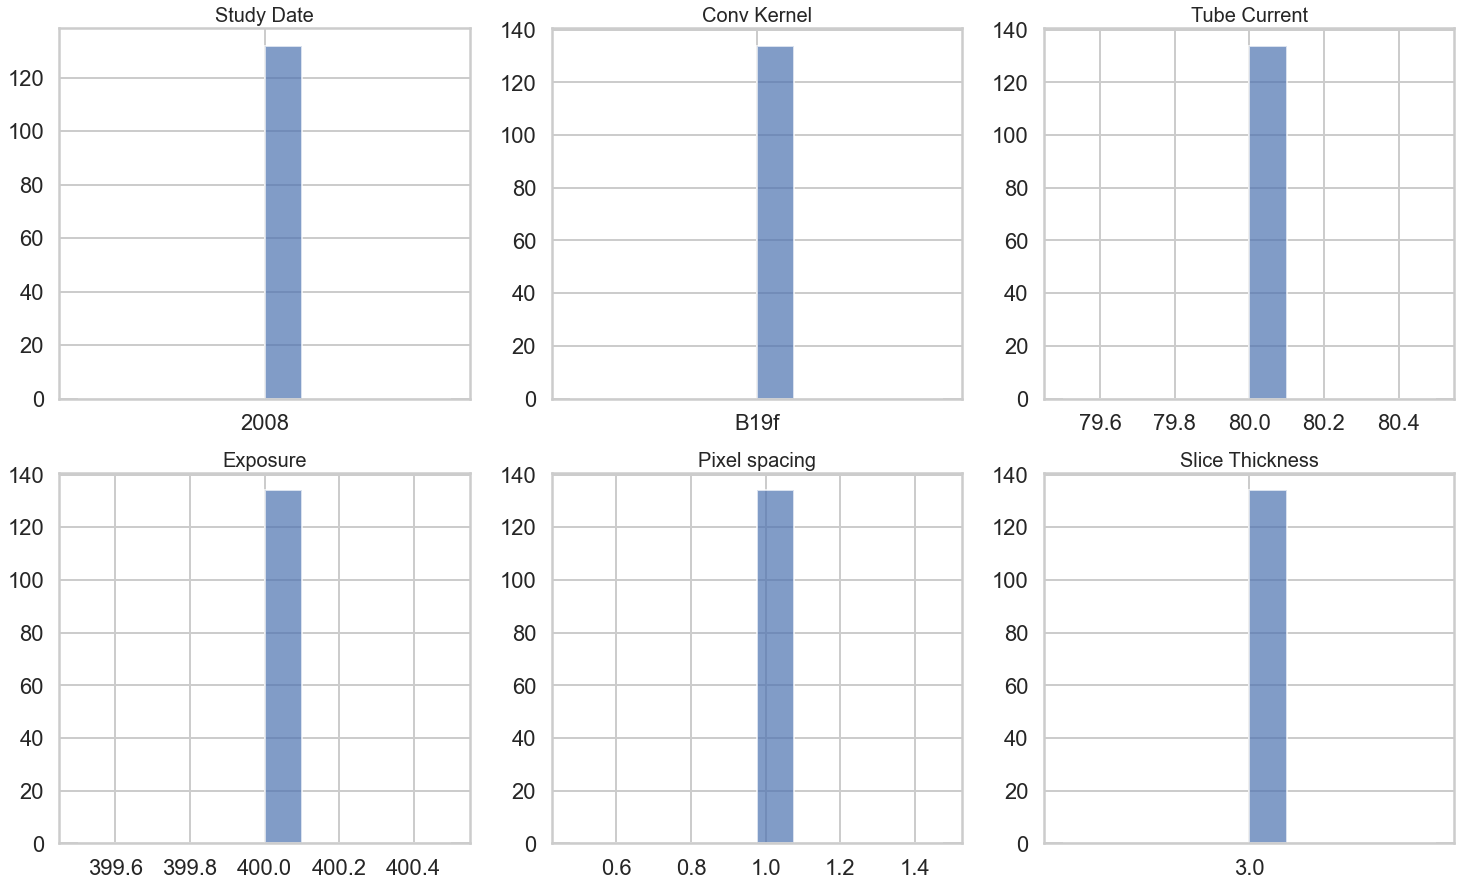

In [6]:
sb.set(context='poster', style='whitegrid')

study_date = sorted([ 'Nan' if x=='' or x=='NaN' else str(x[0:4]) for x in list(dataset_description['SeriesDate'])])[2:]
conv_kernel =['Nan' if x=='' or x=='NaN' else x for x in list(dataset_description['ConvolutionKernel'])]
tube_current =[-1 if x=='' or x=='NaN' else x for x in list(dataset_description['XRayTubeCurrent'])]
exposure =[-1 if x=='' or x=='NaN' else x for x in list(dataset_description['Exposure'])]
ps = sorted([(x[0]) for x in list(filter(lambda x: x != 'NaN', dataset_description['PixelSpacing'].values))])
sl_th = sorted([str(x)[0:3] for x in list(filter(lambda x: x != 'NaN', dataset_description['SliceThickness'].values))])
figures,descriptions = [study_date,conv_kernel,tube_current,exposure,ps,sl_th],['Study Date','Conv Kernel','Tube Current','Exposure','Pixel spacing','Slice Thickness']

fig,ax = plt.subplots(2,3,figsize=(25,15))
for i in range(2):
    for j in range(3):
        ax[i,j].hist(figures.pop(0),alpha=0.7)
        ax[i,j].set_title(descriptions.pop(0),fontsize=20)